In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [47]:
X = np.random.random([20,200])

In [48]:
beta = np.random.random([20, 1])

In [50]:
w = np.exp(np.dot(beta.T, X))

In [53]:
y = w + np.random.poisson(lam=1.0, size=np.shape(w))

In [28]:
def log_likelihood_poisson(theta, X, y):
    log_likelihood = -np.sum(y*np.dot(theta.T, X)) + np.sum(np.exp(np.dot(theta.T, X)))
    return log_likelihood

In [7]:
log_likelihood_poisson(beta, X, y)

-1.2537471514441203e+17

In [8]:
def simple_convex_function(x,param1,param2):
    return (1 + np.sum(np.linalg.norm(x)) + param1 + param2)

In [9]:
param1 = 2
param2 = 3
simple_convex_function([2,2],param1,param2)

8.8284271247461898

In [10]:
myguess = np.random.random([100,1])

In [11]:
res = minimize(simple_convex_function, args=(param1, param2), method = 'CG', x0 = myguess)

In [12]:
res.fun

6.000000065155761

In [13]:
np.linalg.norm(res.x)

6.5155760705670157e-08

In [54]:
myguess = np.random.normal(loc=0.0, scale= 1.0, size=np.shape(beta))
print(np.shape(myguess))
res = minimize(log_likelihood_poisson, args = (X,y), method = 'CG', x0 = myguess, options={'gtol':1e-14})

(20, 1)


In [15]:
res.fun

-1.2537471514437642e+17

In [16]:
np.linalg.norm(res.x - beta)

41.556528730463889

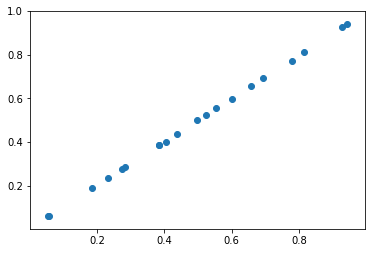

In [55]:
plt.scatter(beta, res.x)

382.706973358
(20, 1)


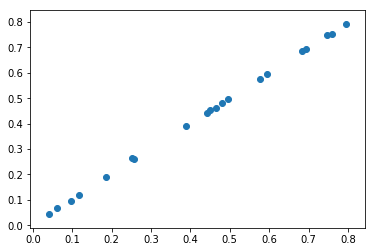

In [66]:
def neglog_likelihood_poisson(theta, X, y):
    return -np.dot(y.T,np.dot(X,theta)) + np.sum(np.exp(np.dot(X,theta)))

X = np.random.random([200,20])
beta = np.random.random([20, 1])
w = np.exp(np.dot(X,beta))
print np.max(w)
y = w+np.random.poisson(lam=1, size=np.shape(w))
myguess = np.random.normal(loc=0.0, scale= 1.0, size=np.shape(beta))
print(np.shape(myguess))
res = minimize(neglog_likelihood_poisson, args = (X,y), method = 'CG', x0 = myguess, options={'gtol':1e-14})
plt.scatter(beta, res.x)